In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [3]:
TS_CSV = './657_xz_s_ts.csv'
CONFIG_CSV='./657_xz_s_regret_out.csv'

In [4]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003280,0.003046,0.011427,0.006515,0.009895,0.006570,0.008160,0.004678,0.003270,...,0.007975,0.007864,0.005876,0.005811,0.005872,0.005882,0.007978,0.006333,0.003115,0.006190
1,1,0.271050,0.265197,0.000000,0.263425,0.306706,0.279128,0.290922,0.255454,0.273304,...,0.331905,0.303662,0.279774,0.266456,0.277016,0.277243,0.289595,0.293034,0.206658,0.284553
2,2,1.643798,1.613356,2.075783,1.573151,2.216862,1.382319,1.219305,1.738846,1.541382,...,1.805894,2.053711,2.558827,2.499182,2.612710,2.491600,2.032545,1.338069,1.803438,1.126174
3,3,5.198998,5.165130,8.639009,5.138844,8.761712,4.940089,4.792706,5.290406,5.082236,...,8.334134,8.706535,9.095372,9.060644,9.149255,9.026484,8.590684,4.890914,5.377268,4.695293
4,4,8.757838,8.721401,12.147315,8.695994,12.238482,8.500104,8.370549,8.841966,8.627586,...,12.189482,12.532181,12.436867,12.696065,12.495766,12.563892,12.365384,8.446915,8.953024,8.269979


In [5]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
0,True,False,32748,disabled,5,29,72,auto,26,34010,205,23166436,percpu,False,never,False,129.326779
1,False,True,5264,secondary,13,4,26,disabled,1316,2857,470,11673419,phycpu,True,always,True,-265.069550
2,False,False,49743,primary,22,14,54,always,2037,15410,600,7710622,disabled,False,default,False,9.501239
3,True,True,13269,primary,8,16,10,always,824,46563,7,27706673,phycpu,True,always,True,-157.517173
4,True,False,7663,primary,11,26,50,always,2211,7212,529,29509878,disabled,True,never,True,109.289176


In [6]:
pd.options.display.max_columns = None
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_mutex_max_spin,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_thp,je_trust_madvise,rss
9,False,True,42403,primary,6,14,19,auto,1180,18648,291,8689618,disabled,False,always,False,-306.281711
46,False,True,13361,primary,6,14,8,auto,1178,20461,414,13320506,disabled,False,always,False,-303.813308
38,False,True,26928,primary,8,13,8,auto,1166,20461,496,13320506,phycpu,False,always,False,-300.891125
43,False,False,40297,secondary,6,14,19,auto,1121,18648,291,6041705,phycpu,False,always,True,-298.528992
40,False,True,42403,secondary,7,12,17,auto,952,18648,291,149299,disabled,False,always,False,-297.141871


In [7]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_10', 'run_47', 'run_39']

In [8]:
custom_df = pd.read_csv('./657_xz_s_custom_ts.csv')
sampled_elements = custom_df['run_custom_jemalloc']
sampled_elements = np.array(sampled_elements)
len(sampled_elements)

492

In [9]:
# sampled_elements = np.array(sampled_elements)

ts = np.array(df['Timestamp'])
max_length = max(len(sampled_elements), len(ts))
sampled_elements = np.pad(sampled_elements, (0, max_length - len(sampled_elements)), 'constant')

In [10]:
regret = np.array(df['run_default_jemalloc']) - sampled_elements
rss_score = sum(regret)
rss_score

np.float64(-72.29831226640361)

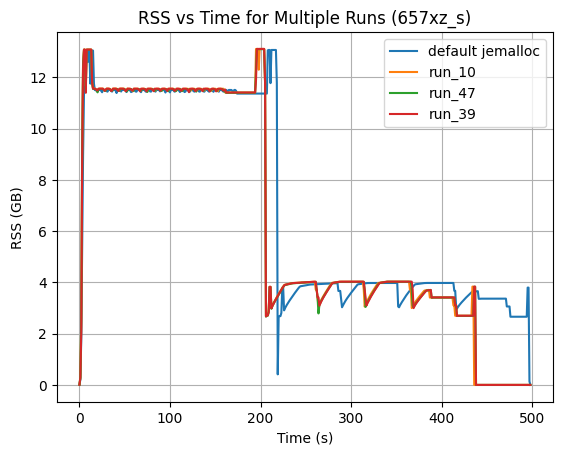

In [13]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
# plt.plot(timestamps, sampled_elements, label='high resource')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


In [12]:
default_conf_dict = {'je_cache_oblivious': True, 'je_metadata_thp': 'disabled', 'je_trust_madvise': False, 'je_retain': True, 'je_dss': 'secondary', 'je_narenas': 160, 'je_oversize_threshold': 8388608, 'je_background_thread': False, 'je_max_background_threads': 40, 'je_dirty_decay_ms': 10000, 'je_muzzy_decay_ms': 10000, 'je_lg_extent_max_active_fit': 6, 'je_tcache': True, 'je_lg_tcache_max': 15, 'je_thp': 'default', 'je_percpu_arena': 'default', 'je_mutex_max_spin': '1600'}
default_conf_dict = dict(sorted(default_conf_dict.items()))
default_conf_dict.update({'rss': 0})
default_conf_df = pd.DataFrame([default_conf_dict])
default_conf_df

smallest_configs = configs.nsmallest(3, 'rss').copy()

# Add an identifier column to distinguish these configurations clearly
smallest_configs['config'] = selected_columns

# Add identifier to default configuration
default_conf_df['config'] = 'default'

# Concatenate vertically to compare clearly
comparison_df = pd.concat([smallest_configs, default_conf_df], ignore_index=True)

# Move 'config' column to the front and 'rss' column to the end for readability
cols = ['config'] + [col for col in comparison_df.columns if col not in ['config', 'rss']] + ['rss']
comparison_df = comparison_df[cols]

comparison_df.T

,0,1,2,3
config,run_10,run_47,run_39,default
je_background_thread,False,False,False,False
je_cache_oblivious,True,True,True,True
je_dirty_decay_ms,42403,13361,26928,10000
je_dss,primary,primary,primary,secondary
je_lg_extent_max_active_fit,6,6,8,6
je_lg_tcache_max,14,14,13,15
je_max_background_threads,19,8,8,40
je_metadata_thp,auto,auto,auto,disabled
je_mutex_max_spin,1180,1178,1166,1600


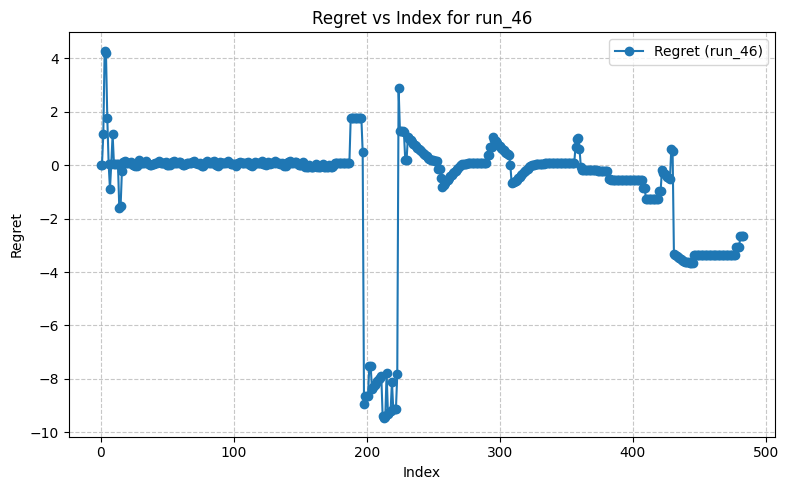

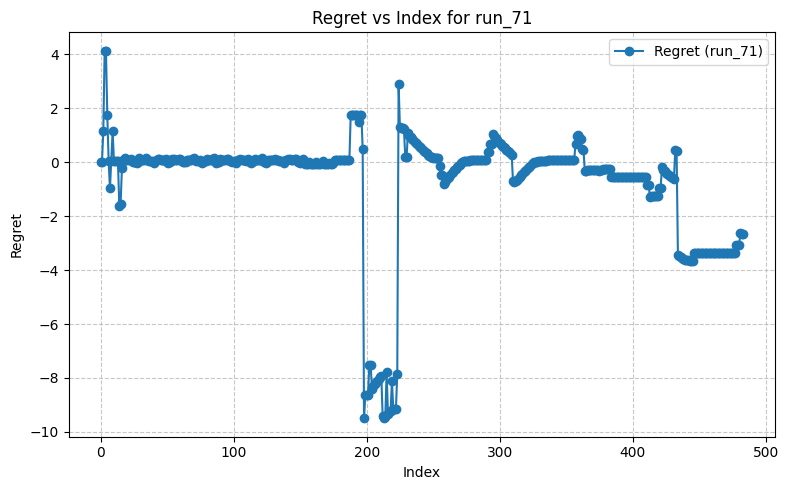

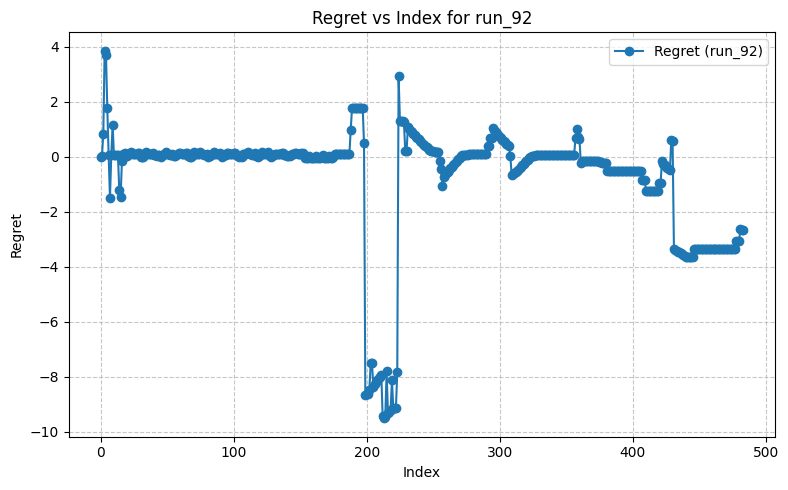

In [10]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  df[column] - df['run_default_jemalloc']
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Index for {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

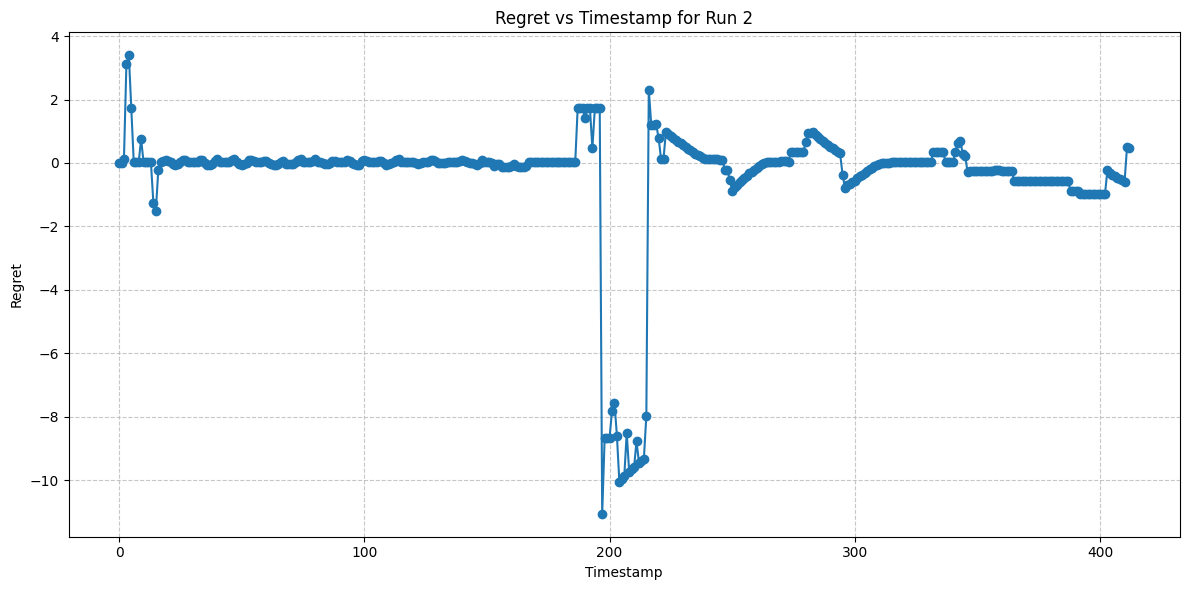

In [17]:
# Convert Timestamp to datetime

# Calculate regret for a specific run (e.g., run 2)
run_column = 'run_41'  # Change this to the column name for the run you want to plot
df['Regret'] = df[run_column] - df['run_default_jemalloc']

intervals = np.diff(df['Timestamp'])
x_range = np.cumsum(np.insert(intervals, 0, 0))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot regret vs timestamp
ax.plot(x_range, df['Regret'], marker='o')

# Customize the plot
ax.set_title('Regret vs Timestamp for Run 2')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Regret')

# Format x-axis to show dates nicely
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# plt.xticks(rotation=45)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

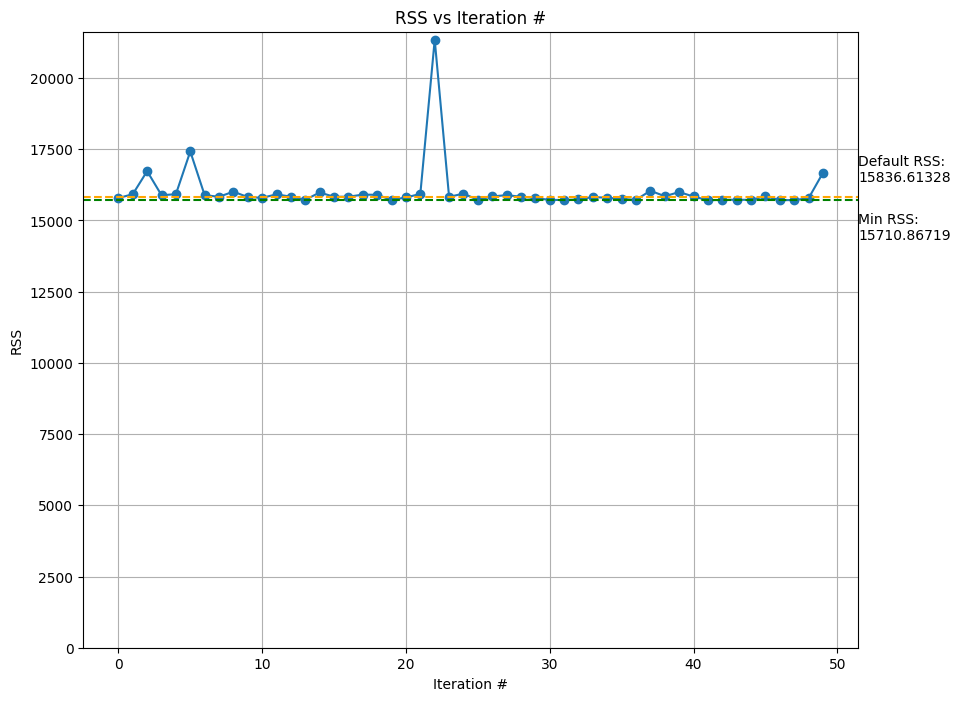

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df['rss'].min()
vertical_space = abs(default_rss - min_rss)
higher_line = max(default_rss, min_rss)
lower_line = min(default_rss, min_rss)

offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # 2% of y-axis range

if vertical_space < offset * 2:
    plt.axhline(y=default_rss, color='orange', linestyle='--')
    plt.text(plt.xlim()[1], higher_line + offset, f'{"Default" if higher_line == default_rss else "Min"} RSS:\n{higher_line:.5f}', 
             verticalalignment='bottom', 
             horizontalalignment='left')
    
    plt.axhline(y=min_rss, color='green', linestyle='--')
    plt.text(plt.xlim()[1], lower_line - offset, f'{"Default" if lower_line == default_rss else "Min"} RSS:\n{lower_line:.5f}', 
             verticalalignment='top', 
             horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [17]:
percent_diff = 100 * (default_rss - df['rss'].min()) / default_rss
percent_diff

np.float64(0.7940213464630282)